<a href="https://colab.research.google.com/github/deep74ap/NeuralNetwork/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


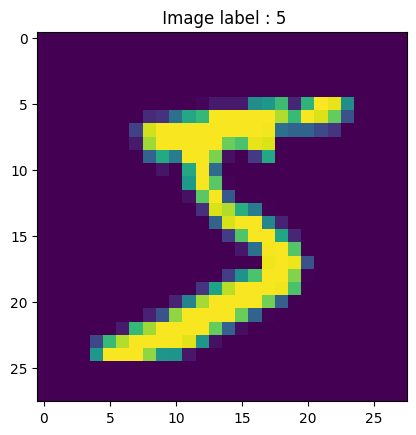

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f" Image label : {y_train[0]}")
plt.show()

In [9]:
#Normalising the data
x_train = x_train/255
x_test = x_test/255

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
y_train.shape

(60000, 10)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))    #Input layer
model.add(Dense(128,activation='relu'))    #Hidden layer
model.add(Dense(10,activation='softmax'))    #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=2)

Epoch 1/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9264 - loss: 0.2555
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9662 - loss: 0.1122
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9765 - loss: 0.0767
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9826 - loss: 0.0580
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9861 - loss: 0.0458
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9898 - loss: 0.0343
Epoch 7/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9908 - loss: 0.0286
Epoch 8/10
1875/1875 - 10s - 6ms/step - accuracy: 0.9929 - loss: 0.0230
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9939 - loss: 0.0193
Epoch 10/10
1875/1875 - 10s - 6ms/step - accuracy: 0.9956 - loss: 0.0150


In [23]:
#Evaluating model : accuracy and loss
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9726 - loss: 0.1008


[0.09013096988201141, 0.9753000140190125]

In [24]:
#Weights for every neurons across all layers
model.get_weights()

[array([[-0.01369485, -0.00417531,  0.05414983, ..., -0.06872694,
         -0.02167178, -0.03896387],
        [ 0.03274862,  0.07198886,  0.02767212, ...,  0.00312934,
         -0.00464433,  0.07908226],
        [ 0.02929126,  0.0122903 , -0.05299965, ..., -0.07627863,
         -0.04571802,  0.07395165],
        ...,
        [ 0.06323627, -0.0677931 ,  0.05048356, ...,  0.00713444,
         -0.01756536, -0.06819547],
        [ 0.03326785,  0.03614815, -0.02292455, ..., -0.04048792,
         -0.03534513, -0.01831246],
        [ 0.05004787,  0.00991944, -0.04780938, ..., -0.03286424,
         -0.03636374, -0.06538351]], dtype=float32),
 array([-0.00213212, -0.06723128,  0.02630135,  0.07425048, -0.10279939,
         0.10215125, -0.19541577, -0.15858464,  0.017712  , -0.10106735,
        -0.05080147,  0.39104295, -0.01580293, -0.05678467, -0.00937088,
         0.1050685 , -0.01912897,  0.24102518,  0.01584587, -0.00562113,
        -0.09760884, -0.04054244, -0.01913495,  0.2192851 ,  0.189

In [25]:
model.save('mnist.h5')

Complex Neural Network with more than one hidden layer

In [26]:
from keras.models import Model
from keras.layers import Input,Flatten,Dense,concatenate

In [27]:
input_layer = Input(shape = (28,28))
flatten = Flatten()(input_layer)
hidden_layer_1 = Dense(128,activation='relu')(flatten)
hidden_layer_2 = Dense(64,activation='relu')(flatten)
hidden_layer_11 = Dense(128,activation='relu')(hidden_layer_1)
hidden_layer_12 = Dense(64,activation='relu')(hidden_layer_1)
concat = concatenate([hidden_layer_11,hidden_layer_12])
output_layer = Dense(10,activation='softmax')(concat)

In [28]:
model = Model(inputs = input_layer,outputs = output_layer)

In [29]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    100,480 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 10)        │      1,930 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 127,178 (496.79 KB)

 Trainable params: 127,178 (496.79 KB)

 Non-trainable params: 0 (0.00 B)

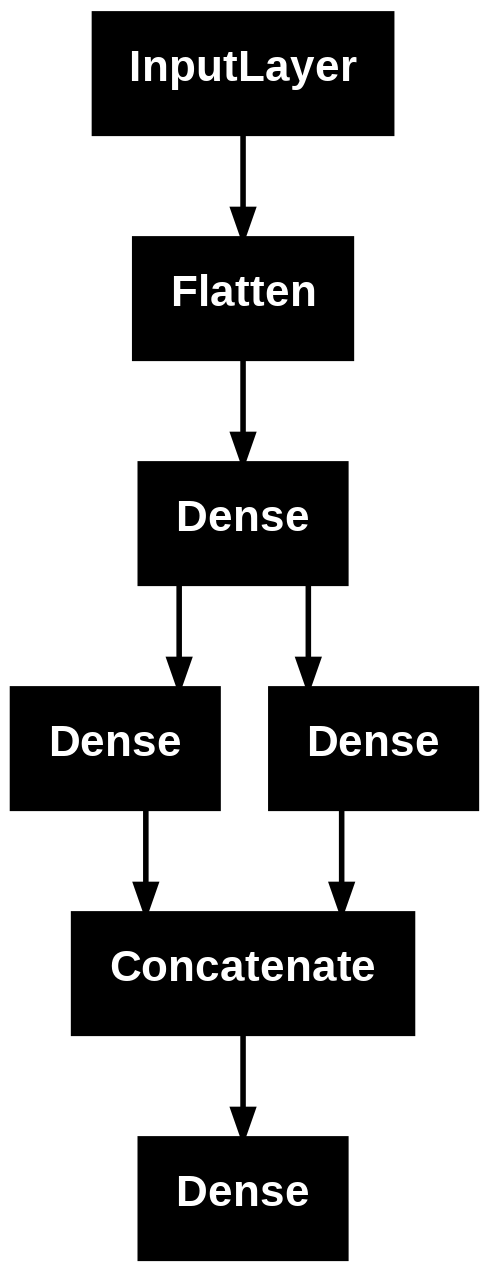

In [31]:
from keras.utils import plot_model
plot_model(model)

In [32]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9321 - loss: 0.2272
Epoch 2/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9708 - loss: 0.0956
Epoch 3/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9784 - loss: 0.0676
Epoch 4/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9831 - loss: 0.0519
Epoch 5/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9860 - loss: 0.0407


In [34]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.1020


[0.08538562804460526, 0.9753999710083008]